# Regression with a Flood Prediction Dataset

## corelacao de pearson

# pip install
##   tensorflow,
##  numpy
##   scikeras
##   seaborn
##   pandas
##   matplotlib
##   sklearn
##   


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import torch
import cv2
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
import os
import csv
import shutil
import keras_core as keras

verbose = 0

Using PyTorch backend.


salvando validacao treino e teste

In [2]:
df = pd.read_csv(r"C:\Users\CaioM\edital109-arthur\digise\CXR8\CXR8\Data_Entry_2017_v2020.csv")

In [3]:

df['Finding Labels'] = df['Finding Labels'].apply(lambda x: x.split('|'))
#df.drop('Image Index', inplace=True, axis= 1)
mlb = MultiLabelBinarizer()
one_hot_encoded = mlb.fit_transform(df['Finding Labels'])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=mlb.classes_)
df_final = pd.concat([df.drop('Finding Labels', axis=1), one_hot_df], axis=1)
df_dum = pd.get_dummies(df_final['Patient Gender'])
df_final = pd.concat([df_final.drop('Patient Gender', axis=1), df_dum], axis=1)
df_dum2 = pd.get_dummies(df_final['View Position'])
df_final = pd.concat([df_final.drop('View Position', axis=1), df_dum2], axis=1)
df_final = df_final.drop('Follow-up #',axis=1)
pd.set_option('display.max_columns', None)


df_final['Image Index'] = df_final['Image Index'].str.replace('.png', '', regex=False)
df_final

,Image Index,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,F,M,AP,PA
0,00000001_000,1,57,2682,2749,0.143,0.143,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,False,True,False,True
1,00000001_001,1,58,2894,2729,0.143,0.143,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,False,True,False,True
2,00000001_002,1,58,2500,2048,0.168,0.168,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,False,True,False,True
3,00000002_000,2,80,2500,2048,0.171,0.171,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,False,True,False,True
4,00000003_001,3,74,2500,2048,0.168,0.168,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001,30801,38,2048,2500,0.168,0.168,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,False,True,False,True
112116,00030802_000,30802,28,2048,2500,0.168,0.168,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,False,True,False,True
112117,00030803_000,30803,42,2048,2500,0.168,0.168,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,True,False,False,True
112118,00030804_000,30804,29,2048,2500,0.168,0.168,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,True,False,False,True


# plot da matriz de correlação

In [4]:
dataset,val_dataset = keras.utils.image_dataset_from_directory(
    'dataset2',
    image_size=(1024,1024),
    validation_split = 0.3,
    batch_size=4,
    subset = 'both',
    color_mode = 'rgb',
    seed = 42
)
print(dataset)
print(val_dataset)

Found 27357 files belonging to 2 classes.
Using 19150 files for training.
Using 8207 files for validation.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 1024, 1024, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 1024, 1024, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


## Create a model with optimizer and init


In [5]:
input_shape = (1024,1024,3)
num_classes = 15
model = keras.Sequential(
    [
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="sigmoid",input_shape=input_shape),
        keras.layers.Conv2D(16, kernel_size=(3, 3), activation="sigmoid"),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32,activation='sigmoid'),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

print(model.summary())

c:\Users\CaioM\.conda\envs\pulmao\lib\site-packages\keras_core\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 1022, 1022, 32)    │        896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (None, 1020, 1020, 16)    │      4,624 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_average_pooling2d        │ (None, 16)                │          0 │
│ (GlobalAveragePooling2D)        │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 16)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 16)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 32)                │        544 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 15)                │        495 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 6,559 (25.62 KB)

 Trainable params: 6,559 (25.62 KB)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy'],
)


##

In [8]:
history = model.fit(
    dataset,
    epochs=10,  # Ajuste o número de épocas conforme necessário
    validation_data=val_dataset
)

Epoch 1/10
4788/4788 ━━━━━━━━━━━━━━━━━━━━ 1945s 406ms/step - accuracy: 0.5055 - loss: 0.8415 - val_accuracy: 0.4818 - val_loss: 0.7055
Epoch 2/10
4788/4788 ━━━━━━━━━━━━━━━━━━━━ 1960s 409ms/step - accuracy: 0.5097 - loss: 0.6955 - val_accuracy: 0.4818 - val_loss: 0.7062
Epoch 3/10
4788/4788 ━━━━━━━━━━━━━━━━━━━━ 1960s 409ms/step - accuracy: 0.5089 - loss: 0.6955 - val_accuracy: 0.4818 - val_loss: 0.7038
Epoch 4/10
4788/4788 ━━━━━━━━━━━━━━━━━━━━ 1958s 409ms/step - accuracy: 0.5080 - loss: 0.6954 - val_accuracy: 0.4818 - val_loss: 0.6994
Epoch 5/10
4788/4788 ━━━━━━━━━━━━━━━━━━━━ 1959s 409ms/step - accuracy: 0.5071 - loss: 0.6949 - val_accuracy: 0.4818 - val_loss: 0.7018
Epoch 6/10
4788/4788 ━━━━━━━━━━━━━━━━━━━━ 1957s 409ms/step - accuracy: 0.5062 - loss: 0.6949 - val_accuracy: 0.4818 - val_loss: 0.7014
Epoch 7/10
4788/4788 ━━━━━━━━━━━━━━━━━━━━ 1955s 408ms/step - accuracy: 0.5071 - loss: 0.6949 - val_accuracy: 0.4818 - val_loss: 0.7008
Epoch 8/10
4788/4788 ━━━━━━━━━━━━━━━━━━━━ 1961s 410ms/s

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
[0.5057440996170044, 0.5080417990684509, 0.5083028674125671, 0.5074673891067505, 0.5051174759864807, 0.5055874586105347, 0.5049086213111877, 0.507310688495636, 0.5049086213111877, 0.5022454261779785]
[0.48178383708000183, 0.48178383708000183, 0.48178383708000183, 0.48178383708000183, 0.48178383708000183, 0.48178383708000183, 0.48178383708000183, 0.48178383708000183, 0.48178383708000183, 0.48178383708000183]


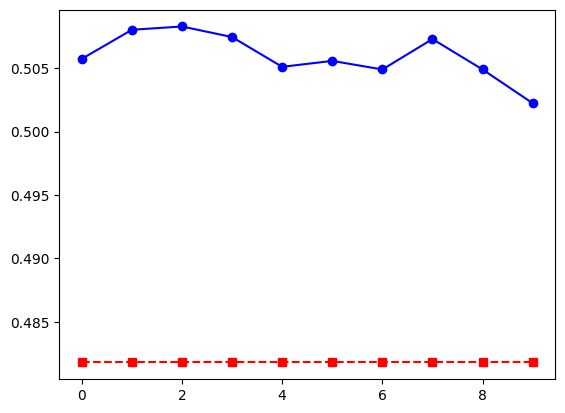

In [10]:
print(history.history.keys())
print(history.history['accuracy'])
print(history.history['val_accuracy'])
plt.plot(history.history['accuracy'], marker='o', linestyle='-', color='b', label='Linha 1')
plt.plot(history.history['val_accuracy'], marker='s', linestyle='--', color='r', label='Linha 2')
plt.show()

In [ ]:
device = torch.cuda.get_device_name(0)
print(f"Nome da placa de vídeo: {device}")
print(f"Versão do CUDA: {torch.version.cuda}")
print(f"Número de GPUs disponíveis: {torch.cuda.device_count()}")